用EM算法计算【三个硬币的问题】

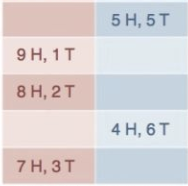

In [1]:
# 定义5个sets的数据
import numpy as np
Data = np.array([[5, 5], [9, 1], [8, 2], [4, 6], [7, 3]])
Data

array([[5, 5],
       [9, 1],
       [8, 2],
       [4, 6],
       [7, 3]])

定义模型变量初值 $\theta_A^{(0)}=0.6,\theta_B^{(0)}=0.5$

In [31]:
def theta0(A_head, B_head):
    return np.array([[A_head, 1-A_head], [B_head, 1-B_head]])

定义$\theta^{t}\rightarrow\theta^{t+1}$的迭代函数

In [76]:
def _EM_iterate(Theta):
    LikilyA = (Theta[0] ** Data).prod(axis=1)
    LikilyB = (Theta[1] ** Data).prod(axis=1)
    LikilyMatrix = np.stack([LikilyA, LikilyB]).T
    ProbMatrix = LikilyMatrix/(LikilyMatrix.sum(axis=1).reshape((-1, 1)))
    ExpectionA = Data * ProbMatrix[:,0].reshape((-1,1))
    ExpectionB = Data * ProbMatrix[:,1].reshape((-1,1))
    ProbA_next = (ExpectionA.sum(axis=0)/ExpectionA.sum())
    ProbB_next = (ExpectionB.sum(axis=0)/ExpectionB.sum())
    Prob_next = np.stack([ProbA_next, ProbB_next], axis=0)
    return Prob_next

In [90]:
def EM_iterate(ThetaA0,ThetaB0):
    i = 0
    Theta = theta0(ThetaA0, ThetaB0)
    while True:
        print("Step{}: A硬币正面的概率为{}, B硬币正面的概率为{}".format(i, Theta[0,0],Theta[1,0]))
        Theta_next = _EM_iterate(Theta)
        i += 1
        if np.abs(Theta_next - Theta).sum() <= 0.0001 or i > 10:
            break
        Theta = Theta_next

In [91]:
EM_iterate(0.6, 0.5)

Step0: A硬币正面的概率为0.6, B硬币正面的概率为0.5
Step1: A硬币正面的概率为0.7130122354005163, B硬币正面的概率为0.5813393083136627
Step2: A硬币正面的概率为0.7452920360819947, B硬币正面的概率为0.5692557501718727
Step3: A硬币正面的概率为0.7680988343673211, B硬币正面的概率为0.5495359141383477
Step4: A硬币正面的概率为0.7831645842999735, B硬币正面的概率为0.5346174541475203
Step5: A硬币正面的概率为0.7910552458637526, B硬币正面的概率为0.526281167029932
Step6: A硬币正面的概率为0.7945325379936993, B硬币正面的概率为0.5223904375178747
Step7: A硬币正面的概率为0.7959286672497984, B硬币正面的概率为0.5207298780860258
Step8: A硬币正面的概率为0.7964656379225263, B硬币正面的概率为0.5200471890029877
Step9: A硬币正面的概率为0.7966683078984393, B硬币正面的概率为0.5197703896938075
Step10: A硬币正面的概率为0.7967441494752117, B硬币正面的概率为0.5196586622041124


检查EM算法对初始值的敏感性

In [92]:
EM_iterate(0.4, 0.6)

Step0: A硬币正面的概率为0.4, B硬币正面的概率为0.6
Step1: A硬币正面的概率为0.5020277967684524, B硬币正面的概率为0.7261346175962776
Step2: A硬币正面的概率为0.5193573571079595, B硬币正面的概率为0.7679650080356558
Step3: A硬币正面的概率为0.5207994326088922, B硬币正面的概率为0.7851830994553255
Step4: A硬币正面的概率为0.5202543772420751, B硬币正面的概率为0.7922578783453182
Step5: A硬币正面的概率为0.5198623312204421, B硬币正面的概率为0.7950515886589887
Step6: A硬币正面的概率为0.5196891949973576, B硬币正面的概率为0.7961280678753401
Step7: A硬币正面的概率为0.519621948749957, B硬币正面的概率为0.7965383712512937
Step8: A硬币正面的概率为0.5195970619571101, B硬币正面的概率为0.7966940909872232
Step9: A硬币正面的概率为0.5195880578491269, B硬币正面的概率为0.7967530973878145


In [94]:
EM_iterate(0.5, 0.5)

Step0: A硬币正面的概率为0.5, B硬币正面的概率为0.5
Step1: A硬币正面的概率为0.66, B硬币正面的概率为0.66
